In [23]:
import os
import gc
from time import time

import natsort
from itertools import count
# import torch
# from pydub import AudioSegment, silence

# Math
from scipy.io import wavfile
import librosa
import numpy as np
from scipy import signal
from scipy.signal import find_peaks

# # Visualization
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.lines import Line2D

import librosa.display
from IPython.display import Audio
from IPython.display import HTML

import itertools
import noisereduce as nr
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, RobustScaler
import sklearn

# keras module
import tensorflow as tf
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow import keras
from tensorflow.keras.models import load_model
from tensorflow.keras import utils
from tensorflow.keras import layers
from tensorflow.keras import activations
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv1D, Conv2D, MaxPooling1D, Embedding, LSTM, Bidirectional, SimpleRNN, GRU

from tensorflow.keras.layers import *
from tensorflow.keras.models import *

# Hyperparameters
sample_rate = 16000
freq_lim = 2048

In [24]:
import os

from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# import mglearn
from os.path import join

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, label_binarize, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier as MLP
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer,accuracy_score,f1_score,roc_auc_score,roc_curve,confusion_matrix,auc
from sklearn.metrics import RocCurveDisplay,ConfusionMatrixDisplay
# import umap
from sklearn.manifold import TSNE

In [25]:
tf.__version__

'2.1.0'

In [26]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [27]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 1753004475195486485,
 name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 17515352883877726814
 physical_device_desc: "device: XLA_CPU device",
 name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 15888020800781720406
 physical_device_desc: "device: XLA_GPU device",
 name: "/device:XLA_GPU:1"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 5906821024793799100
 physical_device_desc: "device: XLA_GPU device",
 name: "/device:XLA_GPU:2"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 3990955294279701745
 physical_device_desc: "device: XLA_GPU device",
 name: "/device:XLA_GPU:3"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 5682215560354308951
 physical_device_desc: "device: XLA_GPU device",


In [28]:
for i in range(2):
    gc.collect()
gc.collect()

0

## Train data import

In [29]:
file_path= 'data/train'

file_list = os.listdir(file_path)
ordered_file_list = natsort.natsorted(file_list)

ordered_file_list

['normal_littmann_2cycles.txt',
 'normal_littmann_2cycles.wav',
 'normal_sim_7cycles.txt',
 'normal_sim_7cycles.wav',
 'wheeze_clinical_train.txt',
 'wheeze_clinical_train.wav',
 'wheeze_expiratory_littmann_2cycles.txt',
 'wheeze_expiratory_littmann_2cycles.wav',
 'wheeze_low_pitch_littmann_2cycles.txt',
 'wheeze_low_pitch_littmann_2cycles.wav',
 'wheeze_monophonic_littmann_2cycles.txt',
 'wheeze_monophonic_littmann_2cycles.wav',
 'wheeze_sim_5cycles.txt',
 'wheeze_sim_5cycles.wav']

In [30]:
# ordered_file_list = ordered_file_list[1:]

In [31]:
# ordered_file_list

In [32]:
len(ordered_file_list)

14

## Test data import

In [33]:
# Clinical_wheezing_copd_210930
test_file_path= 'data/validation'
test_file_list = os.listdir(test_file_path)
ordered_test_file_list = natsort.natsorted(test_file_list)

ordered_test_file_list

['normal_littmann_1cycle.txt',
 'normal_littmann_1cycle.wav',
 'normal_sim_2cycles.txt',
 'normal_sim_2cycles.wav',
 'wheeze_clinical_validation.txt',
 'wheeze_clinical_validation.wav',
 'wheeze_expiratory_littmann_1cycle.txt',
 'wheeze_expiratory_littmann_1cycle.wav',
 'wheeze_low_pitch_littmann_1cycle.txt',
 'wheeze_low_pitch_littmann_1cycle.wav',
 'wheeze_monophonic_littmann_1cycle.txt',
 'wheeze_monophonic_littmann_1cycle.wav',
 'wheeze_sim_2cycles.txt',
 'wheeze_sim_2cycles.wav']

In [34]:
t1, t1_sr = librosa.load(test_file_path + '/' + ordered_test_file_list[7], sr = sample_rate)
t1 = nr.reduce_noise(y=t1, sr=sample_rate)
t1 = t1[:60*16000]
t1_label = pd.read_csv(test_file_path + '/' + ordered_test_file_list[6], sep='\t', header=None)


t2, t2_sr = librosa.load(test_file_path + '/' + ordered_test_file_list[1], sr = sample_rate)
t2 = nr.reduce_noise(y=t2, sr=sample_rate)
t2_label = pd.read_csv(test_file_path + '/' + ordered_test_file_list[0], sep='\t', header=None)


t3, t3_sr = librosa.load(test_file_path + '/' + ordered_test_file_list[3], sr = sample_rate)
t3 = nr.reduce_noise(y=t3, sr=sample_rate)
t3_label = pd.read_csv(test_file_path + '/' + ordered_test_file_list[2], sep='\t', header=None)


t4, t4_sr = librosa.load(test_file_path + '/' + ordered_test_file_list[5], sr = sample_rate)
t4 = nr.reduce_noise(y=t4, sr=sample_rate)
t4_label = pd.read_csv(test_file_path + '/' + ordered_test_file_list[4], sep='\t', header=None)

# Funcition definition 

In [35]:
def make_validation_dataset_keras(file_path, ordered_file_list, n_mels, frame_sec, step_sec, label_ratio):


    data_list = []
    label_list = []

    for index, file in enumerate(ordered_file_list):
        if file[-3:] == 'wav':

            # data load 
            data, data_sr = librosa.load(file_path + '/' + file, sr = sample_rate)
#             data = nr.reduce_noise(data, sr = sample_rate)

            # framing condition
            frame_length = int(frame_sec * sample_rate)
            frame_step = int(step_sec * sample_rate)

            # mel spectrogram extraction
            melS = librosa.feature.melspectrogram(y = data, sr=sample_rate, n_mels=n_mels,
                                                  hop_length=frame_step, win_length=frame_length)
            melS = librosa.power_to_db(melS, ref=np.max)
#             melS = librosa.power_to_db(melS, ref=np.median)

            data_list.append(melS.T)

    # X must be extracted first

    for index, file in enumerate(ordered_file_list):

        if file[-3:] == 'txt':

            # normal and wheeze split
            normal_event = []
            wheeze_event = []

            label = pd.read_csv(file_path + '/' + file, sep='\t', header=None)

            sec_to_index_start = label[0]*16000
            sec_to_index_end = label[1]*16000
            sec_to_index_start = sec_to_index_start.to_numpy().round()
            sec_to_index_end = sec_to_index_end.to_numpy().round()

            for i, val in enumerate(label[2].to_numpy()):
                if val == 1:
                    normal_event.append([int(sec_to_index_start[i]//(step_sec*sample_rate)), 
                                         int(sec_to_index_end[i]//(step_sec*sample_rate))])

                elif val == 2:
                    wheeze_event.append([int(sec_to_index_start[i]//(step_sec*sample_rate)), 
                                         int(sec_to_index_end[i]//(step_sec*sample_rate))])

            normal_event = np.array(normal_event)
            wheeze_event = np.array(wheeze_event)

            y = np.zeros(len(data_list[int(index/2)]))

            # label ratio decision

            for j in normal_event:
                start = j[0]
                end = j[1]
                delta = int((end-start)*label_ratio)
                y[end-delta:end] = 1
#                 y[end:end+delta] = 1


            for k in wheeze_event:
                start = k[0]
                end = k[1]
                delta = int((end-start)*label_ratio)
                y[end-delta:end] = 2
#                 y[end:end+delta] = 2


            label_list.append(y)
    
    X = np.concatenate(data_list, axis = 0)
    X = X.reshape(X.shape[0], X.shape[1])
    X = X.reshape(X.shape[0], X.shape[1], 1)
    y = np.concatenate(label_list, axis = 0)
    y = utils.to_categorical(y)
    
    return X, y


def make_validation_dataset_sklearn(file_path, ordered_file_list, n_mels, frame_sec, step_sec, label_ratio):

    data_list = []
    label_list = []

    for index, file in enumerate(ordered_file_list):
        if file[-3:] == 'wav':

            # data load 
            data, data_sr = librosa.load(file_path + '/' + file, sr = sample_rate)
#             data = nr.reduce_noise(data, sr = sample_rate)

            # framing condition
            frame_length = int(frame_sec * sample_rate)
            frame_step = int(step_sec * sample_rate)

            # mel spectrogram extraction
            melS = librosa.feature.melspectrogram(y = data, sr=sample_rate, n_mels=n_mels,
                                                  hop_length=frame_step, win_length=frame_length)
            melS = librosa.power_to_db(melS, ref=np.max)
#             melS = librosa.power_to_db(melS, ref=np.median)

            data_list.append(melS.T)

    # X must be extracted first

    for index, file in enumerate(ordered_file_list):

        if file[-3:] == 'txt':

            # normal and wheeze split
            normal_event = []
            wheeze_event = []

            label = pd.read_csv(file_path + '/' + file, sep='\t', header=None)

            sec_to_index_start = label[0]*16000
            sec_to_index_end = label[1]*16000
            sec_to_index_start = sec_to_index_start.to_numpy().round()
            sec_to_index_end = sec_to_index_end.to_numpy().round()

            for i, val in enumerate(label[2].to_numpy()):
                if val == 1:
                    normal_event.append([int(sec_to_index_start[i]//(step_sec*sample_rate)), 
                                         int(sec_to_index_end[i]//(step_sec*sample_rate))])

                elif val == 2:
                    wheeze_event.append([int(sec_to_index_start[i]//(step_sec*sample_rate)), 
                                         int(sec_to_index_end[i]//(step_sec*sample_rate))])

            normal_event = np.array(normal_event)
            wheeze_event = np.array(wheeze_event)

            y = np.zeros(len(data_list[int(index/2)]))

            # label ratio decision

            for j in normal_event:
                start = j[0]
                end = j[1]
                delta = int((end-start)*label_ratio)
                y[end-delta:end] = 1
#                 y[end:end+delta] = 1


            for k in wheeze_event:
                start = k[0]
                end = k[1]
                delta = int((end-start)*label_ratio)
                y[end-delta:end] = 2
#                 y[end:end+delta] = 2


            label_list.append(y)
    
    X = np.concatenate(data_list, axis = 0)
    X = X.reshape(X.shape[0], X.shape[1])
#     X = X.reshape(X.shape[0], X.shape[1], 1)
    y = np.concatenate(label_list, axis = 0)
#     y = utils.to_categorical(y)
    
    return X, y


def make_validation_test_dataset_sklearn(file_path, ordered_file_list, n_mels, frame_sec, step_sec, label_ratio):

    data_list = []
    label_list = []

    for index, file in enumerate(ordered_file_list):
        if file[-3:] == 'wav':

            # data load 
            data, data_sr = librosa.load(file_path + '/' + file, sr = sample_rate)
#             data = nr.reduce_noise(data, sr = sample_rate)

            # framing condition
            frame_length = int(frame_sec * sample_rate)
            frame_step = int(step_sec * sample_rate)

            # mel spectrogram extraction
            melS = librosa.feature.melspectrogram(y = data, sr=sample_rate, n_mels=n_mels,
                                                  hop_length=frame_step, win_length=frame_length)
            melS = librosa.power_to_db(melS, ref=np.max)
#             melS = librosa.power_to_db(melS, ref=np.median)

            data_list.append(melS.T)

    # X must be extracted first

    for index, file in enumerate(ordered_file_list):

        if file[-3:] == 'txt':

            # normal and wheeze split
            normal_event = []
            wheeze_event = []

            label = pd.read_csv(file_path + '/' + file, sep='\t', header=None)

            sec_to_index_start = label[0]*16000
            sec_to_index_end = label[1]*16000
            sec_to_index_start = sec_to_index_start.to_numpy().round()
            sec_to_index_end = sec_to_index_end.to_numpy().round()

            for i, val in enumerate(label[2].to_numpy()):
                if val == 'n':
                    normal_event.append([int(sec_to_index_start[i]//(step_sec*sample_rate)), 
                                         int(sec_to_index_end[i]//(step_sec*sample_rate))])

                elif val == 'w':
                    wheeze_event.append([int(sec_to_index_start[i]//(step_sec*sample_rate)), 
                                         int(sec_to_index_end[i]//(step_sec*sample_rate))])

            normal_event = np.array(normal_event)
            wheeze_event = np.array(wheeze_event)

            y = np.zeros(len(data_list[int(index/2)]))

            # label ratio decision

            for j in normal_event:
                start = j[0]
                end = j[1]
                delta = int((end-start)*label_ratio)
                y[end-delta:end] = 1
#                 y[end:end+delta] = 1


            for k in wheeze_event:
                start = k[0]
                end = k[1]
                delta = int((end-start)*label_ratio)
                y[end-delta:end] = 2
#                 y[end:end+delta] = 2


            label_list.append(y)
    
    X = np.concatenate(data_list, axis = 0)
    X = X.reshape(X.shape[0], X.shape[1])
#     X = X.reshape(X.shape[0], X.shape[1], 1)
    y = np.concatenate(label_list, axis = 0)
#     y = utils.to_categorical(y)
    
    return X, y


def make_validation_dataset(file_path, ordered_file_list, n_mels, frame_sec, step_sec, label_ratio):


    data_list = []
    label_list = []

    for index, file in enumerate(ordered_file_list):
        if file[-3:] == 'wav':

            # data load 
            data, data_sr = librosa.load(file_path + '/' + file, sr = sample_rate)
#             data = nr.reduce_noise(data, sr = sample_rate)

            # framing condition
            frame_length = int(frame_sec * sample_rate)
            frame_step = int(step_sec * sample_rate)

            # mel spectrogram extraction
            melS = librosa.feature.melspectrogram(y = data, sr=sample_rate, n_mels=n_mels,
                                                  hop_length=frame_step, win_length=frame_length)
            melS = librosa.power_to_db(melS, ref=np.max)
#             melS = librosa.power_to_db(melS, ref=np.median)

            data_list.append(melS.T)

    # X must be extracted first

    for index, file in enumerate(ordered_file_list):

        if file[-3:] == 'txt':

            # normal and wheeze split
            normal_event = []
            wheeze_event = []

            label = pd.read_csv(file_path + '/' + file, sep='\t', header=None)

            sec_to_index_start = label[0]*16000
            sec_to_index_end = label[1]*16000
            sec_to_index_start = sec_to_index_start.to_numpy().round()
            sec_to_index_end = sec_to_index_end.to_numpy().round()

            for i, val in enumerate(label[2].to_numpy()):
                if val == 1:
                    normal_event.append([int(sec_to_index_start[i]//(step_sec*sample_rate)), 
                                         int(sec_to_index_end[i]//(step_sec*sample_rate))])

                elif val == 2:
                    wheeze_event.append([int(sec_to_index_start[i]//(step_sec*sample_rate)), 
                                         int(sec_to_index_end[i]//(step_sec*sample_rate))])

            normal_event = np.array(normal_event)
            wheeze_event = np.array(wheeze_event)

            y = np.zeros(len(data_list[int(index/2)]))

            # label ratio decision

            for j in normal_event:
                start = j[0]
                end = j[1]
                delta = int((end-start)*label_ratio)
                y[end-delta:end] = 1
#                 y[end:end+delta] = 1


            for k in wheeze_event:
                start = k[0]
                end = k[1]
                delta = int((end-start)*label_ratio)
                y[end-delta:end] = 2
#                 y[end:end+delta] = 2


            label_list.append(y)
    
    X = np.concatenate(data_list, axis = 0)
    X = X.reshape(X.shape[0], X.shape[1])
#     X = X.reshape(X.shape[0], X.shape[1], 1)
    y = np.concatenate(label_list, axis = 0)
#     y = utils.to_categorical(y)
    
    return X, y


def make_train_dataset_keras(file_path, ordered_file_list, n_mels, frame_sec, step_sec, label_ratio):
    
    data_list = []
    label_list = []
    
    # calculated values
    frame_length = int(frame_sec * sample_rate)
    frame_step = int(step_sec * sample_rate)
#     pitch_var = [-1, 1]
    pitch_var = [-3.5, -2, 2, 3.5]
    augmented_number = len(pitch_var)

    for index, file in enumerate(ordered_file_list):
        
        if file[-3:] == 'wav':

            # data load 
            data, data_sr = librosa.load(file_path + '/' + file, sr = sample_rate)
#             data = nr.reduce_noise(data, sr = sample_rate)
            
            for pitch in pitch_var:
                
                ps_data = librosa.effects.pitch_shift(data, sr = sample_rate, n_steps = pitch)

                # mel spectrogram extraction
                melS = librosa.feature.melspectrogram(y = ps_data, sr=sample_rate, n_mels=n_mels,
                                                      hop_length=frame_step, win_length=frame_length)
                melS = librosa.power_to_db(melS, ref=np.max)

                data_list.append(melS.T)
                
            # normal and wheeze split
            normal_event = []
            wheeze_event = []
                
            label = pd.read_csv(file_path + '/' + file[:-3] + 'txt', sep='\t', header=None)
            
            sec_to_index_start = label[0]*16000
            sec_to_index_end = label[1]*16000
            sec_to_index_start = sec_to_index_start.to_numpy().round()
            sec_to_index_end = sec_to_index_end.to_numpy().round()

            for i, val in enumerate(label[2].to_numpy()):
                if val == 1:
                    normal_event.append([int(sec_to_index_start[i]//(step_sec*sample_rate)),
                                         int(sec_to_index_end[i]//(step_sec*sample_rate))])

                elif val == 2:
                    wheeze_event.append([int(sec_to_index_start[i]//(step_sec*sample_rate)),
                                         int(sec_to_index_end[i]//(step_sec*sample_rate))])

            normal_event = np.array(normal_event)
            wheeze_event = np.array(wheeze_event)
            
            y = np.zeros(len(data_list[-1]))
 
            # label ratio decision
            for j in normal_event:
                start = j[0]
                end = j[1]
                delta = int((end-start)*label_ratio)
                y[end-delta:end] = 1

            for k in wheeze_event:
                start = k[0]
                end = k[1]
                delta = int((end-start)*label_ratio)
                y[end-delta:end] = 2
                
            for number in range(augmented_number):
                label_list.append(y)
                
    X = np.concatenate(data_list, axis = 0)
    X = X.reshape(X.shape[0], X.shape[1], 1)
    y = np.concatenate(label_list, axis = 0)
    y = utils.to_categorical(y)
    
    return X, y


def make_train_dataset_sklearn(file_path, ordered_file_list, n_mels, frame_sec, step_sec, label_ratio):
    
    data_list = []
    label_list = []
    
    # calculated values
    frame_length = int(frame_sec * sample_rate)
    frame_step = int(step_sec * sample_rate)
#     pitch_var = [-1, 1]
    pitch_var = [-3.5, -2, 2, 3.5]
    augmented_number = len(pitch_var)

    for index, file in enumerate(ordered_file_list):
        
        if file[-3:] == 'wav':

            # data load 
            data, data_sr = librosa.load(file_path + '/' + file, sr = sample_rate)
#             data = nr.reduce_noise(data, sr = sample_rate)
            
            for pitch in pitch_var:
                
                ps_data = librosa.effects.pitch_shift(data, sr = sample_rate, n_steps = pitch)

                # mel spectrogram extraction
                melS = librosa.feature.melspectrogram(y = ps_data, sr=sample_rate, n_mels=n_mels,
                                                      hop_length=frame_step, win_length=frame_length)
                melS = librosa.power_to_db(melS, ref=np.max)

                data_list.append(melS.T)
                
            # normal and wheeze split
            normal_event = []
            wheeze_event = []
                
            label = pd.read_csv(file_path + '/' + file[:-3] + 'txt', sep='\t', header=None)
            
            sec_to_index_start = label[0]*16000
            sec_to_index_end = label[1]*16000
            sec_to_index_start = sec_to_index_start.to_numpy().round()
            sec_to_index_end = sec_to_index_end.to_numpy().round()

            for i, val in enumerate(label[2].to_numpy()):
                if val == 1:
                    normal_event.append([int(sec_to_index_start[i]//(step_sec*sample_rate)),
                                         int(sec_to_index_end[i]//(step_sec*sample_rate))])

                elif val == 2:
                    wheeze_event.append([int(sec_to_index_start[i]//(step_sec*sample_rate)),
                                         int(sec_to_index_end[i]//(step_sec*sample_rate))])

            normal_event = np.array(normal_event)
            wheeze_event = np.array(wheeze_event)
            
            y = np.zeros(len(data_list[-1]))
 
            # label ratio decision
            for j in normal_event:
                start = j[0]
                end = j[1]
                delta = int((end-start)*label_ratio)
                y[end-delta:end] = 1

            for k in wheeze_event:
                start = k[0]
                end = k[1]
                delta = int((end-start)*label_ratio)
                y[end-delta:end] = 2
                
            for number in range(augmented_number):
                label_list.append(y)
                
    X = np.concatenate(data_list, axis = 0)
#     X = X.reshape(X.shape[0], X.shape[1], 1)
    y = np.concatenate(label_list, axis = 0)
#     y = utils.to_categorical(y)
    
    return X, y


def make_train_dataset(file_path, ordered_file_list, n_mels, frame_sec, step_sec, label_ratio):
    
    data_list = []
    label_list = []
    
    # calculated values
    frame_length = int(frame_sec * sample_rate)
    frame_step = int(step_sec * sample_rate)
#     pitch_var = [-1, 1]
    pitch_var = [-3.5, -2, 2, 3.5]
    augmented_number = len(pitch_var)

    for index, file in enumerate(ordered_file_list):
        
        if file[-3:] == 'wav':

            # data load 
            data, data_sr = librosa.load(file_path + '/' + file, sr = sample_rate)
#             data = nr.reduce_noise(data, sr = sample_rate)
            
            for pitch in pitch_var:
                
                ps_data = librosa.effects.pitch_shift(data, sr = sample_rate, n_steps = pitch)

                # mel spectrogram extraction
                melS = librosa.feature.melspectrogram(y = ps_data, sr=sample_rate, n_mels=n_mels,
                                                      hop_length=frame_step, win_length=frame_length)
                melS = librosa.power_to_db(melS, ref=np.max)

                data_list.append(melS.T)
                
            # normal and wheeze split
            normal_event = []
            wheeze_event = []
                
            label = pd.read_csv(file_path + '/' + file[:-3] + 'txt', sep='\t', header=None)
            
            sec_to_index_start = label[0]*16000
            sec_to_index_end = label[1]*16000
            sec_to_index_start = sec_to_index_start.to_numpy().round()
            sec_to_index_end = sec_to_index_end.to_numpy().round()

            for i, val in enumerate(label[2].to_numpy()):
                if val == 1:
                    normal_event.append([int(sec_to_index_start[i]//(step_sec*sample_rate)),
                                         int(sec_to_index_end[i]//(step_sec*sample_rate))])

                elif val == 2:
                    wheeze_event.append([int(sec_to_index_start[i]//(step_sec*sample_rate)),
                                         int(sec_to_index_end[i]//(step_sec*sample_rate))])

            normal_event = np.array(normal_event)
            wheeze_event = np.array(wheeze_event)
            
            y = np.zeros(len(data_list[-1]))
 
            # label ratio decision
            for j in normal_event:
                start = j[0]
                end = j[1]
                delta = int((end-start)*label_ratio)
                y[end-delta:end] = 1

            for k in wheeze_event:
                start = k[0]
                end = k[1]
                delta = int((end-start)*label_ratio)
                y[end-delta:end] = 2
                
            for number in range(augmented_number):
                label_list.append(y)
                
    X = np.concatenate(data_list, axis = 0)
    X = X.reshape(X.shape[0], X.shape[1])
#     X = X.reshape(X.shape[0], X.shape[1], 1)
    y = np.concatenate(label_list, axis = 0)
#     y = utils.to_categorical(y)
    
    return X, y



def make_test_dataset(test_signal, test_label, n_mels, frame_sec, step_sec):
    
    # test signal must be noise filtered

    # framing condition
    frame_length = int(frame_sec * sample_rate)
    frame_step = int(step_sec * sample_rate)
    
#     # noise reduce
#     test_signal = nr.reduce_noise(test_signal, sr = sample_rate)

    # mel spectrogram extraction
    melS = librosa.feature.melspectrogram(y = test_signal, sr=sample_rate, 
                                          n_mels=n_mels, hop_length=frame_step, win_length=frame_length)
    melS = librosa.power_to_db(melS, ref=np.max)
#     melS = librosa.power_to_db(melS, ref=np.median)

    X_test = melS.T
    
    sec_to_index = test_label[0]*16000
    event_index = sec_to_index//(step_sec*sample_rate)

    y_test = np.zeros(len(X_test))

    for i in event_index:
        y_test[int(i)] = 2
        
    return X_test, y_test


def make_test_dataset_keras(test_signal, test_label, n_mels, frame_sec, step_sec):
    
    # test signal must be noise filtered

    # framing condition
    frame_length = int(frame_sec * sample_rate)
    frame_step = int(step_sec * sample_rate)
    
    # noise reduce
    test_signal = nr.reduce_noise(test_signal, sr = sample_rate)

    # mel spectrogram extraction
    melS = librosa.feature.melspectrogram(y = test_signal, sr=sample_rate, 
                                          n_mels=n_mels, hop_length=frame_step, win_length=frame_length)
    melS = librosa.power_to_db(melS, ref=np.max)
#     melS = librosa.power_to_db(melS, ref=np.median)

    X_test = melS.T
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)
    
    sec_to_index = test_label[0]*16000
    event_index = sec_to_index//(step_sec*sample_rate)

    y_test = np.zeros(len(X_test))

    for i in event_index:
        y_test[int(i)] = 2
        
    return X_test, y_test


def wheeze_per_resp_acc(y_pred, y_test):
    
    peaks, _ = find_peaks(y_pred)

    after_peaks = peaks[1:]
    before_peaks = peaks[:-1]

    term = after_peaks - before_peaks

    start = 0
    pred_resp_count = 0
    pred_normal_count = 0
    pred_wheeze_count = 0

    for index, val in enumerate(term):
        if val >= 100:
            pred_resp_count += 1
            thres = y_pred[peaks[start:index+1]].mean()
            if thres > 1.0:
                pred_wheeze_count += 1
            elif thres == 1.0 : 
                pred_normal_count += 1
            start = index+1
    
    print('prediction')
    print(pred_wheeze_count, '/', pred_resp_count)
    
    peaks, _ = find_peaks(y_test)

    after_peaks = peaks[1:]
    before_peaks = peaks[:-1]

    term = after_peaks - before_peaks

    start = 0
    test_resp_count = 0
    test_normal_count = 0
    test_wheeze_count = 0

    for index, val in enumerate(term):
        if val >= 100:
            test_resp_count += 1
            thres = y_test[peaks[start:index+1]].mean()
            if thres > 1.0:
                test_wheeze_count += 1
            elif thres == 1.0 : 
                test_normal_count += 1
            start = index+1
             
    print('test')
    print(test_wheeze_count, '/', test_resp_count)
    
    return pred_wheeze_count, pred_resp_count

In [36]:
def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, 
                       model, param_grid, cv=5, scoring_fit='roc_auc',
                       do_probabilities = False):
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
#         cv=cv, 
        n_jobs=1, 
#         scoring=scoring_fit,
#         verbose=2
    )
    
    gs.fit(X_train_data, y_train_data)
    
    if do_probabilities:
        pred = gs.predict_proba(X_test_data)
    else:
        pred = gs.predict(X_test_data)
    
    return gs, pred

## fixed parameter results

In [38]:
n_mels = 128
frame_sec = 0.025
step_sec = 0.01
label_ratio = 1

# X, y = make_train_dataset_keras(file_path, ordered_file_list, n_mels, frame_sec, step_sec, label_ratio)
# X_val, y_val = make_validation_dataset_keras(val_file_path, val_ordered_file_list, n_mels, frame_sec, step_sec, label_ratio)
X_train, y_train = make_train_dataset_sklearn(file_path, ordered_file_list, n_mels, frame_sec, step_sec, label_ratio)
# X_test, y_test = make_validation_dataset_sklearn(val_file_path, val_ordered_file_list, n_mels, frame_sec, step_sec, label_ratio)
#%% Split data
# X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False)
# n_timesteps, n_features, n_outputs = X.shape[1], X.shape[2], y.shape[1]

In [39]:
print(len(X_train))

32084


In [57]:
t_x, t_y = make_test_dataset_keras(t1, t1_label, n_mels, frame_sec, step_sec)
t2_x, t2_y = make_test_dataset_keras(t2, t2_label, n_mels, frame_sec, step_sec)
t3_x, t3_y = make_test_dataset_keras(t3, t3_label, n_mels, frame_sec, step_sec)
t4_x, t4_y = make_test_dataset_keras(t4, t4_label, n_mels, frame_sec, step_sec)

## SVC 

In [181]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [108]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto', probability=True))
SVC = clf.fit(X_train, y_train)

In [125]:
import joblib
joblib.dump(SVC, 'saved_pipes/220725_SVC_ex_set.joblib')

['saved_pipes/220725_SVC_ex_set.joblib']

In [182]:
model = joblib.load('saved_pipes/220725_SVC_ex_set.joblib')

In [185]:
y_pred=model.predict(X_test)
y_prob = model.predict_proba(X_test)

In [186]:
acc =accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred,average='weighted')

y_true = utils.to_categorical(y_test)

roc_auc = roc_auc_score(y_true, y_prob, multi_class='ovr')
cm = confusion_matrix(y_test, y_pred, normalize='true')

print('acc:', acc)
print('f1:', f1)
print('roc_auc:', roc_auc)
print(cm)

acc: 0.4009937888198758
f1: 0.38373668649201653
roc_auc: 0.7262530590475359
[[0.18950793 0.00488003 0.80561204]
 [0.06913997 0.58178752 0.34907251]
 [0.11408016 0.0606372  0.82528263]]


In [187]:
y_prob_0 = y_prob[:,0]
y_prob_1 = y_prob[:,1]
y_prob_2 = y_prob[:,2]

y_true_0 = y_true[:,0]
y_true_1 = y_true[:,1]
y_true_2 = y_true[:,2]

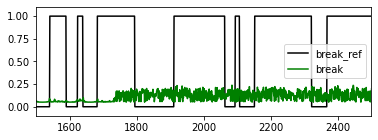

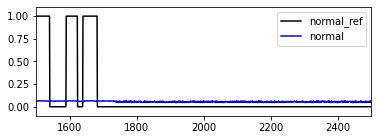

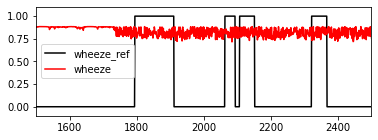

In [204]:
view_start = 1500
view_end = 2500

plt.figure(figsize=(6,2))
# plt.figure()
plt.plot(y_true_0, label='break_ref', color='black')
plt.plot(y_prob_0, label='break', color='g')
plt.ylim(-0.1,1.1)
plt.xlim(view_start,view_end)
plt.legend()
plt.savefig('svg_images/figure6-1_break.svg')

plt.figure(figsize=(6,2))
plt.plot(y_true_1, label='normal_ref', color='black')
plt.plot(y_prob_1, label='normal', color='b')
plt.ylim(-0.1,1.1)
plt.xlim(view_start,view_end)
plt.legend()
plt.savefig('svg_images/figure6-1_normal.svg')

plt.figure(figsize=(6,2))
plt.plot(y_true_2, label='wheeze_ref', color='black')
plt.plot(y_prob_2, label='wheeze', color='r')
plt.ylim(-0.1,1.1)
plt.xlim(view_start,view_end)
plt.legend()
plt.savefig('svg_images/figure6-1_wheeze.svg')

## Test with clinical 

In [206]:
# Clinical_wheezing_copd_210930
test_file_path= 'data/raw data/mamoori/test/s1_1'
test_file_list = os.listdir(test_file_path)
ordered_test_file_list = natsort.natsorted(test_file_list)

ordered_test_file_list

['1_clinical(s1_1)_JJY_extrcted_ISH.txt',
 '1_clinical(s1_1)_JJY_extrcted_ISH.wav']

In [207]:
n_mels = 128
frame_sec = 0.025
step_sec = 0.01
label_ratio = 1

X_test, y_test =make_validation_test_dataset_sklearn(test_file_path, ordered_test_file_list, n_mels, frame_sec, step_sec, label_ratio)

In [208]:
model = joblib.load('saved_pipes/220725_SVC_ex_set.joblib')

In [209]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)

y_true = utils.to_categorical(y_test)

In [210]:
y_prob.shape

(13251, 3)

In [211]:
y_true.shape

(13251, 3)

In [212]:
acc =accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred,average='weighted')

roc_auc = roc_auc_score(y_true, y_prob, multi_class='ovr')
cm = confusion_matrix(y_test, y_pred, normalize='true')

print('acc:', acc)
print('f1:', f1)
print('roc_auc:', roc_auc)
print(cm)

acc: 0.11984001207456041
f1: 0.02564942909554578
roc_auc: 0.41870319666819933
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [213]:
y_prob_0 = y_prob[:,0]
y_prob_1 = y_prob[:,1]
y_prob_2 = y_prob[:,2]

y_true_0 = y_true[:,0]
y_true_1 = y_true[:,1]
y_true_2 = y_true[:,2]

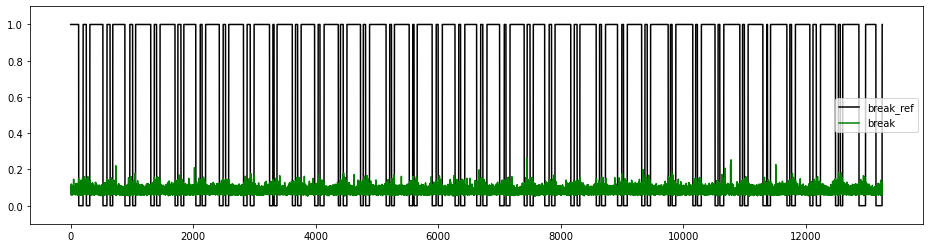

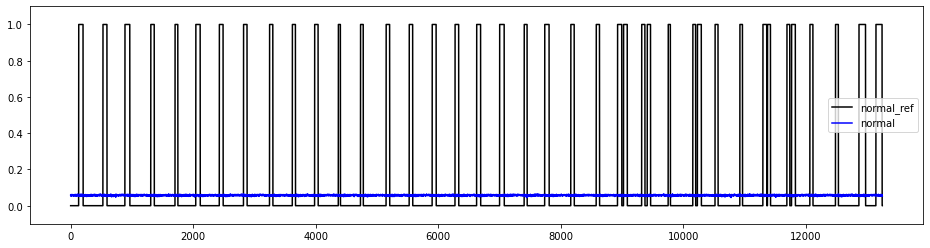

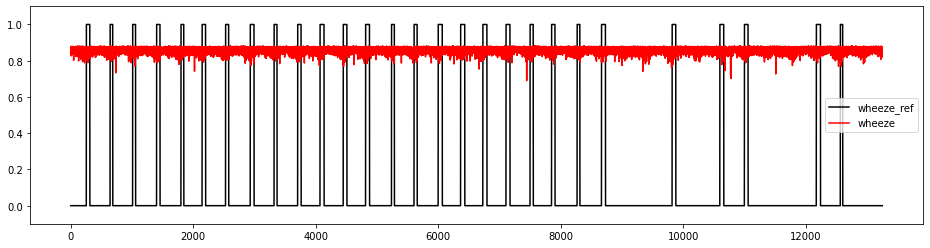

In [214]:
# view_start = 0
# view_end = 2000

plt.figure(figsize=(16,4))
plt.plot(y_true_0, label='break_ref', color='black')
plt.plot(y_prob_0, label='break', color='g')
plt.ylim(-0.1,1.1)
# plt.xlim(view_start,view_end)
plt.legend()

plt.figure(figsize=(16,4))
plt.plot(y_true_1, label='normal_ref', color='black')
plt.plot(y_prob_1, label='normal', color='b')
plt.ylim(-0.1,1.1)
# plt.xlim(view_start,view_end)
plt.legend()

plt.figure(figsize=(16,4))
plt.plot(y_true_2, label='wheeze_ref', color='black')
plt.plot(y_prob_2, label='wheeze', color='r')
plt.ylim(-0.1,1.1)
# plt.xlim(view_start,view_end)
plt.legend()